# Long-form vs. wide-form data
> https://seaborn.pydata.org/tutorial/data_structure.html
- When plotting x against y, each variable should be a vector.
- Sns accepts datasets that have more than one vector organized in same tabular fashion.
- long & wide form are really diff, and sns trat each defferently.
- Most sns funct.s accepted data represented w/onjs. from pd and np + lists or dicts.

In [1]:
# 'flights' dataset: num of airline passengers who flew each month (49 - 60)
import pandas as pd
import seaborn as sns

df_full = sns.load_dataset('flights')
print(df_full.shape)
df_full.iloc[[0, 5, 9, -9, -5, -1]]

(144, 3)


,year,month,passengers
0,1949,Jan,112
5,1949,Jun,135
9,1949,Oct,119
135,1960,Apr,461
139,1960,Aug,606
143,1960,Dec,432


In [6]:
#df_full.info()

In [7]:
#df_full.describe()

## Long-form data
- Each column is a variable (e/variable is a col).
- Each row is an observation (e/observatin is a row)
- More than a table es a list
- flights dataset is long-form native

With long-form data, columns in the table are given roles in the plot by explicitly assigning them to one of the variables. For example, making a monthly plot of the number of passengers per year looks like this:

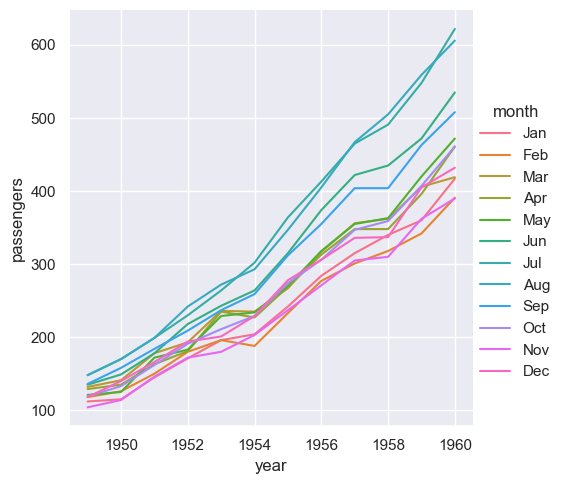

In [17]:
### .relplot: fig-level interface for drawing relational plots onto a FacetGrid.
#sns.set_theme()
sns.set_style('darkgrid')
sns.relplot(data=df_full, x="year", y="passengers", hue="month", kind="line")
#sns.relplot(data=df_full, x="year", y="passengers")

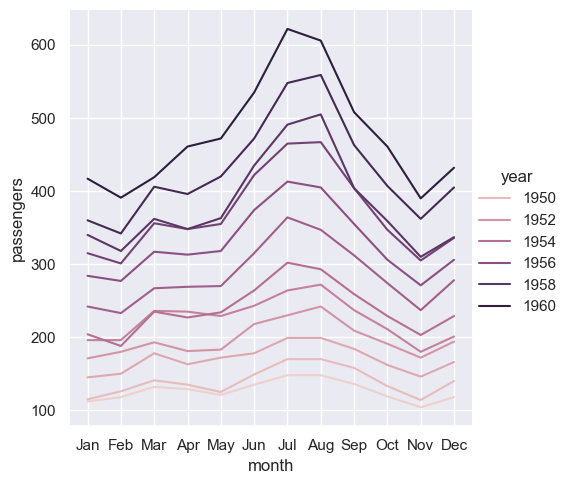

In [28]:
# Changing axis and hue
sns.relplot(data=df_full, x='month', y='passengers', hue='year', kind='line')

### 1. Line Charts
- setting x, y. x= year col, y= num col, hue= month col

<Axes: xlabel='year', ylabel='passengers'>

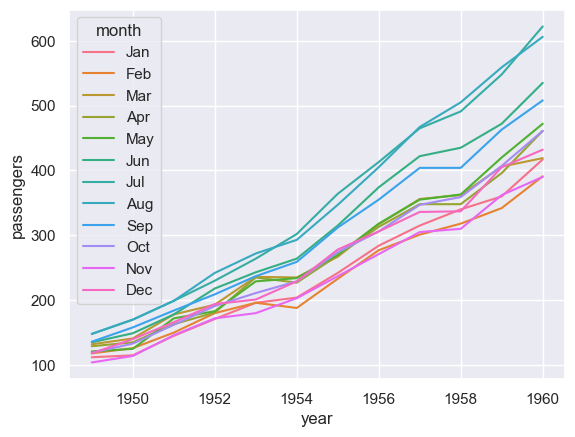

In [20]:
### lineplot: Draw a line plot with possibility of several semantic groupings.
# x, y
sns.lineplot(data=df_full, x='year', y='passengers', hue='month')

<Axes: xlabel='month', ylabel='passengers'>

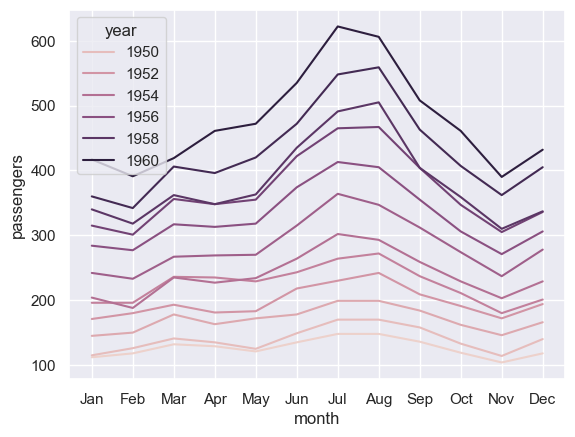

In [29]:
sns.lineplot(data=df_full, x='month', y='passengers', hue='year')

The advantage of long-form data is that it lends itself well to this explicit specification of the plot. It can accommodate datasets of arbitrary complexity, so long as the variables and observations can be clearly defined. But this format takes some getting used to, because it is often not the model of the data that one has in their head.

## Wide-form data
- Each observation is defined by the value at a cell and the cordinates of that cell (row and col).

For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:

In [22]:
df_wide = df_full.pivot(index='year', columns='month',
                        values='passengers')
print(df_wide.shape)
df_wide.iloc[[0, 5, 9, -9, -5, -1]]

(12, 12)


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1954,204,188,235,227,234,264,302,293,259,229,203,229
1958,340,318,362,348,363,435,491,505,404,359,310,337
1952,171,180,193,181,183,218,230,242,209,191,172,194
1956,284,277,317,313,318,374,413,405,355,306,271,306
1960,417,391,419,461,472,535,622,606,508,461,390,432


With long-form data, we can access variables in the dataset by their name. That is not the case with wide-form data. Nevertheless, because there is a clear association between the dimensions of the table and the variable in the dataset, seaborn is able to assign those variables roles in the plot.

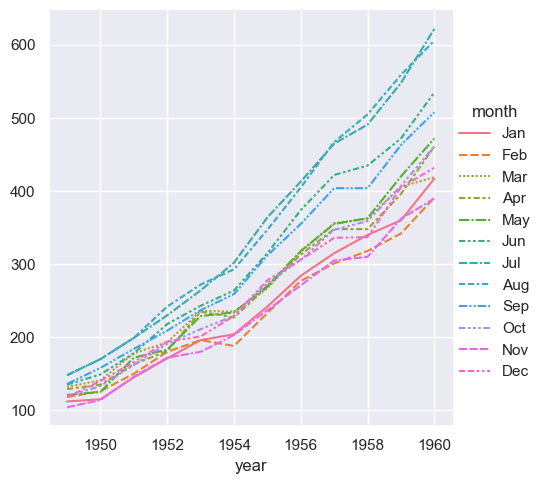

In [24]:
sns.relplot(data=df_wide, kind="line")

'ALMOST' the same chart but... we lost value mean (passengers) then have no y-axis label

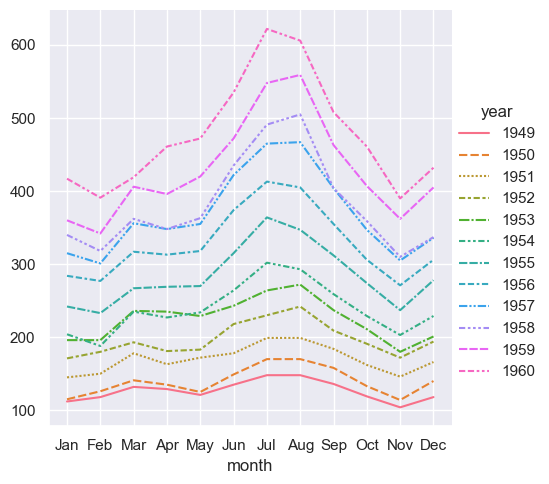

In [31]:
### To achive the remaping year-month we need to 'transpose' the table
sns.relplot(data=df_wide.transpose(), kind='line')

<Axes: xlabel='year'>

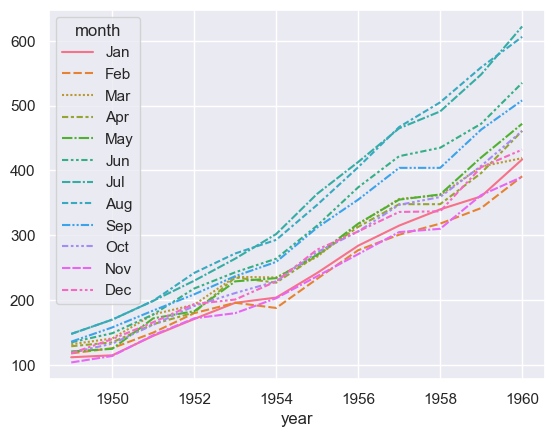

In [30]:
sns.lineplot(df_wide)

<Axes: xlabel='month'>

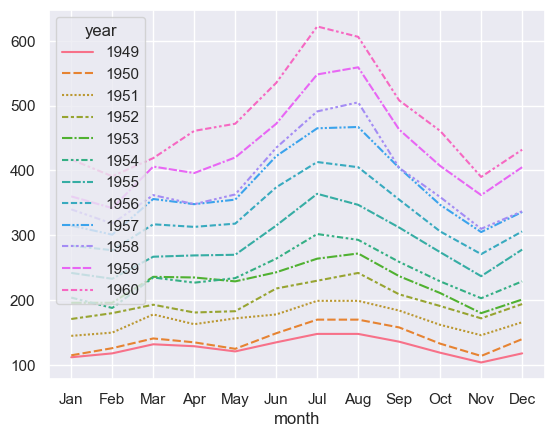

In [35]:
### To achive the remaping year-month we need to 'transpose' the table
sns.lineplot(data=df_wide.transpose())

## Messy Data
- datasets cannot be clearly interpreted using either long-form or wide-form rules.
- In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table.

> Opossite is __Tidy Data__: Tidy datasets are easy to manipulate, model and visualise, and have a specific structure:
each variable is a column, each observation is a row, and each type of observational unit
is a table.

In [37]:
df_ana = sns.load_dataset('anagrams')
print(df_ana.shape)
df_ana.iloc[[0, 5, 9, -9, -5, -1]]

(20, 5)


,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
5,6,divided,5,5.0,6
9,10,divided,6,5.0,6
11,12,focused,8,9.0,8
15,16,focused,6,8.0,7
19,20,focused,6,6.0,5


The attention variable is between-subjects, but there is also a within-subjects variable: the number of possible solutions to the anagrams, which varied from 1 to 3. The dependent measure is a score of memory performance. These two variables (number and score) are jointly encoded across several columns. As a result, the whole dataset is neither clearly long-form nor clearly wide-form.

How might we tell seaborn to plot the average score as a function of attention and number of solutions? We’d first need to coerce the data into one of our two structures. Let’s transform it to a tidy long-form table, such that each variable is a column and each row is an observation. We can use the method pandas.DataFrame.melt() to accomplish this task:

In [44]:
ana_long = df_ana.melt(id_vars=['subidr', 'attnr'], var_name='solutions',
                     value_name='score')
print(ana_long.shape)
ana_long.iloc[[0, 5, 9, -9, -5, -1]]

(60, 4)


,subidr,attnr,solutions,score
0,1,divided,num1,2.0
5,6,divided,num1,5.0
9,10,divided,num1,6.0
51,12,focused,num3,8.0
55,16,focused,num3,7.0
59,20,focused,num3,5.0


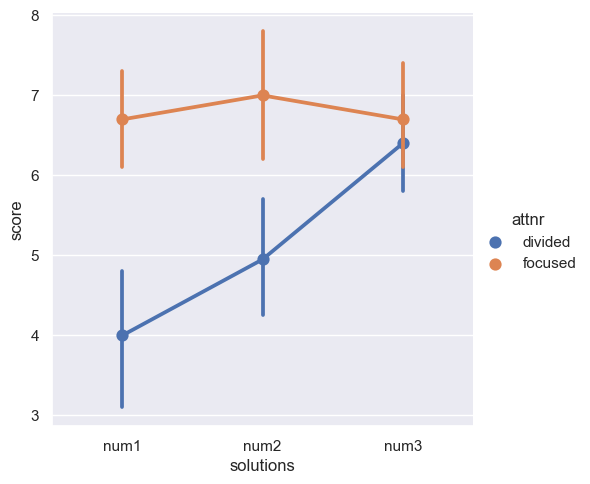

In [45]:
sns.catplot(data=ana_long, x="solutions", y="score",
            hue="attnr", kind="point")

## JM - change wide to long
- long to wide pivot (index  , cols  , values)
- for wide to long also use melt

In [55]:
df_long = df_wide.melt(value_name='passengers', ignore_index=False)
print(df_long.shape)
df_long.iloc[[0, 5, 9, -9, -5, -1]]

(144, 2)


,month,passengers
year,,
1949,Jan,112
1954,Jan,204
1958,Jan,340
1952,Dec,194
1956,Dec,306
1960,Dec,432


In [63]:
lst = list(df_wide.columns)
df_long = df_wide.melt(value_vars=lst, value_name='passenger',
                      ignore_index=False)
print(df_long.shape)
df_long.iloc[[0, 5, 9, -9, -5, -1]]

(144, 2)


,month,passenger
year,,
1949,Jan,112
1954,Jan,204
1958,Jan,340
1952,Dec,194
1956,Dec,306
1960,Dec,432
